In [1]:
import os
os.chdir('../')

import src.dataloader as dl
from src.preprocess import *
from src.single_factor import SingleFactorTester
from src.utils import *

In [2]:
dl.rq_initialize()
df_basic = dl.load_basic_info()
df_indus_mapping = dl.load_industry_mapping()

D:\conda\envs\multifactor\lib\site-packages\rqdatac\client.py:236: UserWarning: Your account will be expired after  80 days. Please call us at 0755-22676337 to upgrade or purchase or renew your contract.
  warnings.warn("Your account will be expired after  {} days. "


Function 'load_basic_info' executed in 6.8883s


In [3]:
# Preprocess
filter = TimeAndStockFilter(df_basic)
df_test = filter.run()

df_test = df_test.merge(df_indus_mapping['pri_indus_code'], how='left', left_on='stock', right_index=True)

df_test = add_factors(df_test, {'value': ['pe_ratio_ttm']})
df_test = standardize_factors(df_test, ['pe_ratio_ttm'])

Function '__init__' executed in 0.4870s
Function 'preprocess' executed in 2.5930s
Function 'filter_dates' executed in 0.9840s
Function 'filter_stocks' executed in 4.4110s
Function 'postprocess' executed in 0.5430s
['./data/factor\\value\\pe_ratio_ttm.h5']
Function 'add_factors' executed in 11.9584s
Function 'standardize_factors' executed in 4.3876s


In [4]:
tester = SingleFactorTester(df_test)
tester.t_value_test("pe_ratio_ttm")

,value
t值序列绝对值平均值,3.413026
t 值序列绝对值大于 2 的占比,0.638655
t 值序列均值的绝对值除以 t 值序列的标准差,-0.030620
因子收益率序列平均值,0.001674
因子收益率均值零假设检验的 t 值,0.193117


IC 均值: -0.0204
IC 标准差: 0.0886
IR 比率: -23.02%
IC 值序列大于零的占比: 42.86%


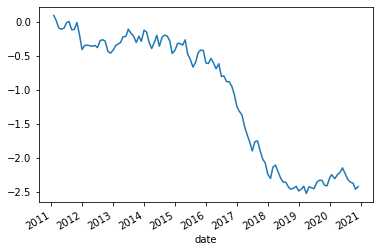

In [5]:
tester.IC_test("pe_ratio_ttm")